# 前言

python是当前数据分析最流行的工具之一，在做数据分析的时候我们经常会用到一些统计学的基础知识和概念，如概率，分布，直方图，箱体图，分位数等等。不可否认的是R语言及其工具是统计分析最专业的武器，正因为它太过专业(使用者需要具备统计学的专业知识)，使得它的受众局限于特定领域的专业人士,而python是后起之秀，它瑞士军刀般的灵活性正被越来越多的IT从业人员所使用，同时python也包含了很多第三方的数据分析工具库，今天我们就来使用python对真实房屋销售数据进行分析,同时还会对其中涉及到的一些统计学的基础概念进行讲解，希望我分享的东西对那些想成为数据科学家和机器学习工程师的朋友们带来一定帮助, 好了,废话少说，让我们撸起袖子，干起来吧！

# 数据

我们的数据来自于kaggle，它是关于房屋的销售数据，你可以点击这里进行下载。下面是数据字段的含义在下载页面中有介绍，我就不一一说明了。

下载地址:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='XXX', api_key='XXX') #需要注册自己的账号
from plotly import tools
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

在这里我们用到了plotly库，plotly是开挂的作图神器，可以供js, python, R, DB等使用，我们用它来进行一些交互式的可视化操作如画直方图、箱线图等，但是使用plotly需要在它网站上注册一个账号,否则无法使用。朋友们可以在这里点击这里进行注册。

注册地址:https://plot.ly/settings/api

In [5]:
df = pd.read_csv('./data/house_train.csv')
df.drop('Id', axis=1, inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 单变量分析

在统计学中,我们把变量一般分为两类:分类型变量和数值型变量。数值型变量又可分为连续型和离散型，分类型变量又可分为普通型分类变量和有序型分类变量:
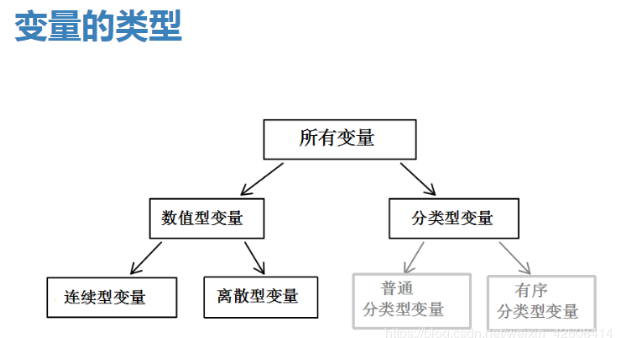

我们使用describe()命令可以查看数据中说有数值型变量的分布情况：

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


同样我们可以使用describe(include=['0'])命令来查看数据中的所有分类型变量的分布情况:

In [7]:
table_cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

# 直方图

对于数值型变量，我们一般会用直方图来展示其数据的分布，下面我们画一下房屋销售价格(SalePrice)的直方图，其中参数bins表示X轴被划分若干区间的数量,y轴表示对应的价格区间在数据中出现的数量(频率)



In [8]:
df['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='销售价格直方图')

# 箱线图

 箱线图并不显示数据分布的形状，但它可以让我们更好地了解数据分布的中心位置和扩散程度以及可能存在的任何潜在异常值。 箱线图和直方图通常互为补充，有助于我们更好地了解数据,下面我们解释一下箱线图，箱线图是描述数据值与数据数量之间的关系:
 
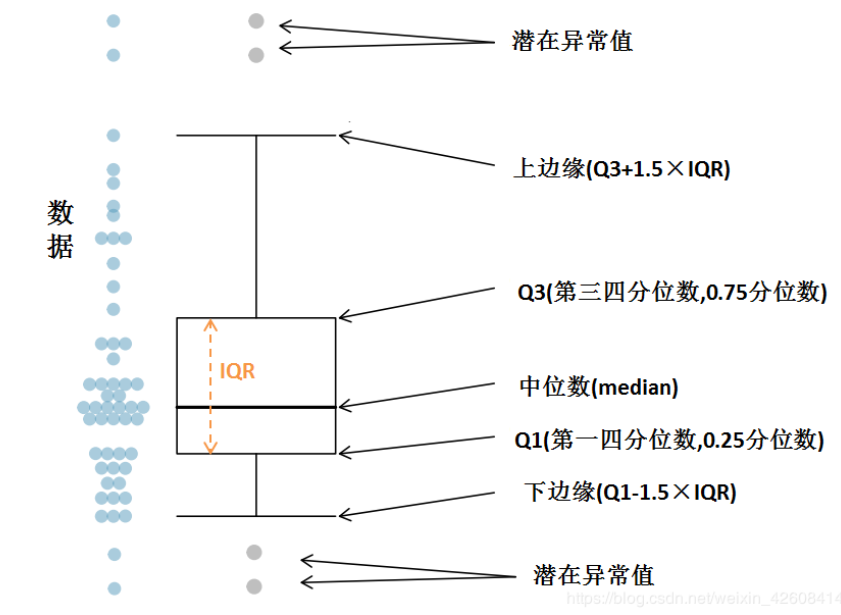
 
 我们将一组样本数据进行排序，然后我们观察数据值与数据数量之间的关系，我们就可以画出所谓的箱线图，如上图所示Q1表示第一四分位数，Q3表示第三四分位数，IQR表示四分位数间距，任何落在上边缘和下边缘范围之外的数据我们称为潜在异常值，即 异常值<(Q1-1.5×IQR) 或者 异常值>(Q3+1.5×IQR). 
 
 最大值的上限位置位于Q3+1.5×IQR。最大值上限位置以外的数据，我们称为潜在的异常值。

下面我们查看房屋销售价格的箱线图,从图中我们可以看到数据的最小值，最大值，第一四分位数(Q1)，第三四分位数(Q3)，中位数(median)。

In [9]:
df['SalePrice'].iplot(kind='box', title='销售价格箱线图')

# 分组查看箱线图和直方图

## 对变量CentralAir进行分组查看它们对销售价格的影响

我们想通过分组的方式查看当分类型变量取不同的值时它对房屋销售价格有什么影响，如带有空调的房子和不带空调的房子，它们的销售价格会有差异吗？房屋的车库面积(1车位，2车位...)对房屋销售价格会有什么影响吗？

In [10]:
# plotly.tools.set_credentials_file(username='tongzheming', api_key='6nJu1wfwzWOvyFZKDFzK')

trace0 = go.Box(
    y=df.loc[df['CentralAir'] == 'Y']['SalePrice'],
    name = '带空调',
    marker = dict(color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['CentralAir'] == 'N']['SalePrice'],
    name = '不带空调',
    marker = dict(color = 'rgb(0, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title = "销售价格箱体图"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



从上面的箱线图中我们可以看见带空调的房屋销售价格的中位数(median)比不带空调的价格要高

带中央空调与不带中央空调的房子它们的房屋销售价格是否存在差异？ 从下面的直方图中我可以发现带空调的房屋销售价格与不带空调的房屋销售价格相比整体往右边偏移，说明有空调的房屋销售价格的均值要高于不带空调的价格。

In [11]:
trace0 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'Y']['SalePrice'], name='带中央空调',
    opacity=0.75
)
trace1 = go.Histogram(
    x=df.loc[df['CentralAir'] == 'N']['SalePrice'], name='不带中央空调',
    opacity=0.75
)

data = [trace0, trace1]
layout = go.Layout(barmode='overlay', title='中央空调与销售价格的关系直方图')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



同样我们可以使用pandas的groupby方法对相关变量进行分组统计: 

In [12]:
df.groupby('CentralAir')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
CentralAir,,,,,,,,
N,95.0,105264.073684,40671.273961,34900.0,82000.0,98000.0,128500.0,265979.0
Y,1365.0,186186.709890,78805.206820,52000.0,134800.0,168000.0,219210.0,755000.0


我们看到有空调的房屋销售价格的均值(mean)明显高于不带空调的房屋销售价格。 

## 对车库面积进行分组查看它们对销售价格的影响

In [13]:
trace0 = go.Box(
    y=df.loc[df['GarageCars'] == 0]['SalePrice'],
    name = 'no garage',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['GarageCars'] == 1]['SalePrice'],
    name = '1-car garage',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df.loc[df['GarageCars'] == 2]['SalePrice'],
    name = '2-cars garage',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=df.loc[df['GarageCars'] == 3]['SalePrice'],
    name = '3-cars garage',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=df.loc[df['GarageCars'] == 4]['SalePrice'],
    name = '4-cars garage',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "车库大小与销售价格箱体图"
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



我们看到3车位的房屋销售价格的中位数最高其次是4车位，2车位的，不带车库房屋的销售价格中位数最低。从一般常识来说车库面积越大房屋价格也应该越高,可是从数据的分析中我们发现3车位的价格要高于4车位的价格。这可能和家庭的人口结构有关，所以有时候不能完全相信常识。

## 不带车库的房屋销售价格的直方图

In [14]:
df.loc[df['GarageCars'] == 0]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='不带车库的房屋销售价格直方图')

## 带1个车位的房屋销售价格直方图

In [15]:
df.loc[df['GarageCars'] == 1]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='房屋销售价格直方图-带1个车位的车库')

## 带2个车位的房屋销售价格直方图 

In [16]:
df.loc[df['GarageCars'] == 2]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='房屋销售价格直方图-带2个车位的车库')

## 带3个车位的房屋销售价格直方图 

In [17]:
df.loc[df['GarageCars'] == 3]['SalePrice'].iplot(
    kind='hist',
    bins=50,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='房屋销售价格直方图-带3个车位的车库')

## 带4个车位的房屋销售价格直方图 

In [18]:
df.loc[df['GarageCars'] == 4]['SalePrice'].iplot(
    kind='hist',
    bins=10,
    xTitle='price',
    linecolor='black',
    yTitle='count',
    title='Histogram of Sale Price of houses with 4-car garage')

# 频率分析 

频率会告诉我们事情发生的频率。 频率表为我们提供了数据的快照，以便我们能从中找出数据中潜在的模式。

## Overall Quality 频率表

OverallQual变量表示“整体材料和成品质量”，它的值取自1-10中任意一个数，下面我们查看不同成品质量值所占的比重:

In [19]:
x = df.OverallQual.value_counts()
x/x.sum()

5     0.271918
6     0.256164
7     0.218493
8     0.115068
4     0.079452
9     0.029452
3     0.013699
10    0.012329
2     0.002055
1     0.001370
Name: OverallQual, dtype: float64

## GarageCars(车库面积) 频率表

GarageCars变量表示车库中的车位数，它的值取自0-4中任意一个数，下面我们查看不同车位数所占的比重:

In [20]:
x = df.GarageCars.value_counts()
x/x.sum()

2    0.564384
1    0.252740
3    0.123973
0    0.055479
4    0.003425
Name: GarageCars, dtype: float64

## 是否带空调 频率表

CentralAir变量房屋是否带有中央空调，它的值取自Y,N中任意一个数，下面我们查看Y和N所占的比重:

In [21]:
x = df.CentralAir.value_counts()
x/x.sum()

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

## 数值型变量的整体摘要 

我们可以通过describe()方法对数值型变量进行整体性摘要，下面我们获取销售价格的整体摘要:

In [22]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

我们也可以单独计算销售价格的各个单项的统计摘要:

In [23]:
print("销售价格均值, - Pandas方法: ", df.SalePrice.mean())
print("销售价格均值, - Numpy方法: ", np.mean(df.SalePrice))
print("价格中位数: - Pandas方法", df.SalePrice.median())
print("50th 分位数,等同于中位数 - Numpy方法: ", np.percentile(df.SalePrice, 50))
print("75th 分位数 - Numpy方法:: ", np.percentile(df.SalePrice, 75))
print("75th 分位数 - Pandas方法: ", df.SalePrice.quantile(0.75))

销售价格均值, - Pandas方法:  180921.19589041095
销售价格均值, - Numpy方法:  180921.19589041095
价格中位数: - Pandas方法 163000.0
50th 分位数,等同于中位数 - Numpy方法:  163000.0
75th 分位数 - Numpy方法::  214000.0
75th 分位数 - Pandas方法:  214000.0


接下来我们使用2种方法来计算IQR所占比例：

In [24]:
print('SalePrice的IQR(Q3-Q1)所占比例: ', np.mean((df.SalePrice >= 129975) & (df.SalePrice <= 214000)))

print("SalePrice的IQR(Q3-Q1)所占比例:",len(df[(df.SalePrice>=129975)&(df.SalePrice<=214000)])/len(df))

SalePrice的IQR(Q3-Q1)所占比例:  0.5020547945205479
SalePrice的IQR(Q3-Q1)所占比例: 0.5020547945205479


我们看到两种方法计算SalePrice的IQR的结果都是一样的，IQR占了50%的数据量。

下面我计算地下室面积的IQR所占比例，同样我们用两种方法来计算:

In [25]:
df.TotalBsmtSF.describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [26]:
print('地下室面积(TotalBsmtSF)的IQR(Q3-Q1)所占比例:',np.mean((df.TotalBsmtSF >= 795.75) & (df.TotalBsmtSF <= 1298.25)))

print('地下室面积(TotalBsmtSF)的IQR(Q3-Q1)所占比例:',len(df[(df.TotalBsmtSF>=795.75)&(df.TotalBsmtSF<=1298.25)])/len(df))

地下室面积(TotalBsmtSF)的IQR(Q3-Q1)所占比例: 0.5
地下室面积(TotalBsmtSF)的IQR(Q3-Q1)所占比例: 0.5


下面我们想看一下销售价格IQR区间内的数据和地下室面积IQRQ区间内的数据是否有重合，我们将销售价格的IQR和地下室面积的IQR做一个并集，如果他们之间没有重合，那么并集所占比例正好为1，因为它正好覆盖整个数据集，如果他们之间有重合，那么并集所占比例将大于0.5且小于1.

In [27]:
sprice_q1= 129975
sprice_q3=214000
a = (df.SalePrice >= sprice_q1) & (df.SalePrice <= sprice_q3)

tbs_q1=795.75
tbs_q3 = 1298.25
b = (df.TotalBsmtSF >= tbs_q1) & (df.TotalBsmtSF <= tbs_q3)

print(np.mean(a | b))

0.7143835616438357


下面我们计算房屋带空调和不带空调的IQR: 

In [28]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='N']['SalePrice'], [75,25])
iqr = q75 - q25
print('没有空调的房屋销售价格IQR: ', iqr)

没有空调的房屋销售价格IQR:  46500.0


In [29]:
q75, q25 = np.percentile(df.loc[df['CentralAir']=='Y']['SalePrice'], [75,25])
iqr = q75 - q25
print('有空调的房屋销售价格IQR: ', iqr)

有空调的房屋销售价格IQR:  84410.0


# 分层

分层是一种从数据集中获取更多信息的方法，它将数据集划分为更小，更均匀的子集，通过分层我们可以创建新的特征。下面我们来创建一个新的特征:“房龄”

In [30]:
df['HouseAge'] = 2019 - df['YearBuilt']
df.HouseAge.describe()

count    1460.000000
mean       47.732192
std        30.202904
min         9.000000
25%        19.000000
50%        46.000000
75%        65.000000
max       147.000000
Name: HouseAge, dtype: float64

我们将房龄划分成若干个区间,然后我们查看房龄的箱线图：

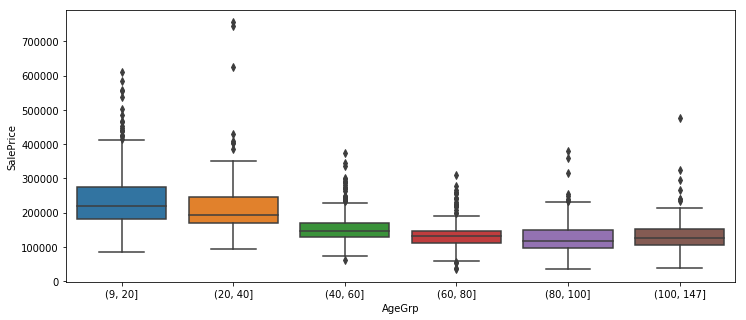

In [31]:
df["AgeGrp"] = pd.cut(df.HouseAge, [9, 20, 40, 60, 80, 100, 147]) 
plt.figure(figsize=(12, 5)) 
sns.boxplot(x="AgeGrp", y="SalePrice", data=df);

我们看到房龄越小，价格中位数越高，这也是合理的因为新房子的价格应该要比老房子的价格高。房价似乎随着房龄的增加而最近减小，但是一个有趣的现象是房龄超过100岁的房屋销售价格似乎略微高于之前的（80,100）的房龄的房价。

下面我们在房龄的基础上加入空调变量，我们想看看不同的房龄区间和房屋是否带空调对房价的影响：

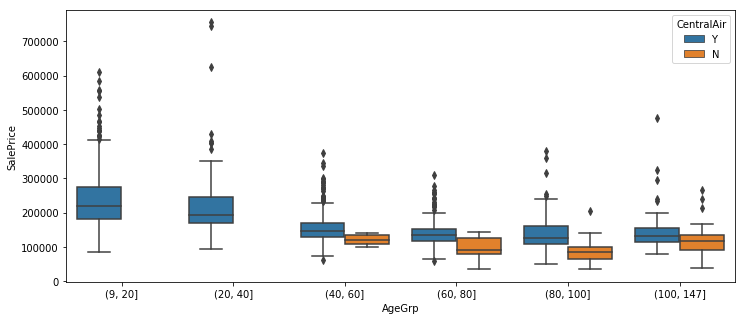

In [32]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="AgeGrp", y="SalePrice", hue="CentralAir", data=df)
plt.show();

上图中我们可以发现，小于40年房龄的房子都带有空调，大于40年房龄的房子开始出现不带空调的情况，这也应该是合理的，40年以上房龄的老房子，那个年底空调不知道发明了没有，即便已经发明了也应该是没有普及，所以不带空调的房子还是比较普遍。

同样我们也可以在空调变量的基础上加上房龄变量，然后我查看它们与房价之间的关系：

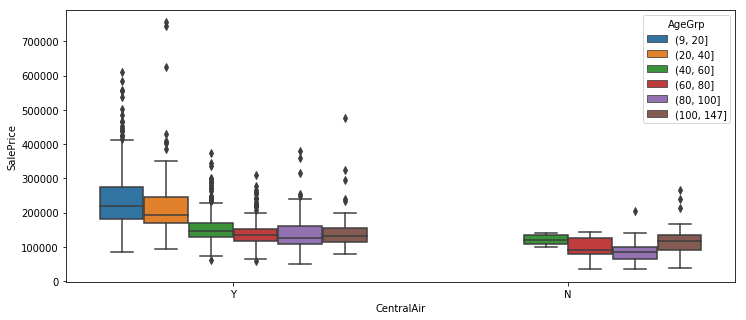

In [33]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="CentralAir", y="SalePrice", hue="AgeGrp", data=df)
plt.show();

我们发现在带有空调的房屋中，房价的变化趋势随着房龄的增加而减少，这个情况类似与之前单独展示房龄和房价的箱线图的情形一样，在不带空调的房屋中房龄都大于40年，100年以上房龄的房价似乎是最高的。

接下来我们按照房龄和空调变量进行分组，然后统计住宅类型(BldgType)的数量分布情况:

In [34]:
df1 = df.groupby(["AgeGrp", "CentralAir"])["BldgType"]
df1 = df1.value_counts()
df1 = df1.unstack()
df1 = df1.apply(lambda x: x/x.sum(), axis=1) # 标准化处理(归一化)
print(df1.to_string(float_format="%.3f"))

BldgType               1Fam  2fmCon  Duplex  Twnhs  TwnhsE
AgeGrp     CentralAir                                     
(9, 20]    Y          0.782     NaN     NaN  0.046   0.172
(20, 40]   Y          0.827     NaN   0.053  0.010   0.111
(40, 60]   N          0.167   0.167   0.667    NaN     NaN
           Y          0.813   0.008   0.067  0.059   0.053
(60, 80]   N          0.556   0.148   0.296    NaN     NaN
           Y          0.955   0.030   0.015    NaN     NaN
(80, 100]  N          0.926   0.074     NaN    NaN     NaN
           Y          0.992   0.008     NaN    NaN     NaN
(100, 147] N          0.771   0.229     NaN    NaN     NaN
           Y          0.860   0.120   0.020    NaN     NaN


我们发现在所有的房屋中(不管房龄大小)住宅类型为"1Fam"的所占比重最大，房龄越大住宅类型越少， 80年以上的房龄大部分只有“1Fam”和“2fmCon”两种住宅类型。越古老的房子越趋向于没有空调。


# 多变量分析

前面我们所做的分析都是基于单个变量的分析，接下来我们要进行多个变量同时进行分析。

## 散点图
我们首先画一下居住面积(GrLivArea)和房屋销售价格的散点图，从散点图中我们发现房屋居住面积和销售价格呈现正相关趋势。

In [35]:
df.iplot(
    x='GrLivArea',
    y='SalePrice',
    xTitle='地上居住面积',
    yTitle='销售价格',
    mode='markers',
    title='房屋价格与居住面积散点分布')

## 2D密度联合图

接下来我们要画2D密度联合图，我们要在在散点图的基础上画热力图，在顶部和右侧分布画对应热力图的居住面积和销售价格的密度图

In [36]:
trace1 = go.Scatter(
    x=df['GrLivArea'], y=df['SalePrice'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=df['GrLivArea'], y=df['SalePrice'], name='密度', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=df['GrLivArea'], name='地面居住面积密度',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=df['SalePrice'], name='价格密度', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## 分类变量的分层探索 

我们将继续探索居住面积(GrLivArea)和销售价格之间的关系,不过这次我们住宅类型(BldgType)分层的方式来研究，我们要按5种住宅类型，分别画出5个居住面积和销售价格的散点图。

In [37]:
trace0 = go.Scatter(x=df.loc[df['BldgType'] == '1Fam']['GrLivArea'], y=df.loc[df['BldgType'] == '1Fam']['SalePrice'], mode='markers', name='1Fam')
trace1 = go.Scatter(x=df.loc[df['BldgType'] == 'TwnhsE']['GrLivArea'], y=df.loc[df['BldgType'] == 'TwnhsE']['SalePrice'], mode='markers', name='TwnhsE')
trace2 = go.Scatter(x=df.loc[df['BldgType'] == 'Duplex']['GrLivArea'], y=df.loc[df['BldgType'] == 'Duplex']['SalePrice'], mode='markers', name='Duplex')
trace3 = go.Scatter(x=df.loc[df['BldgType'] == 'Twnhs']['GrLivArea'], y=df.loc[df['BldgType'] == 'Twnhs']['SalePrice'], mode='markers', name='Twnhs')
trace4 = go.Scatter(x=df.loc[df['BldgType'] == '2fmCon']['GrLivArea'], y=df.loc[df['BldgType'] == '2fmCon']['SalePrice'], mode='markers', name='2fmCon')

fig = tools.make_subplots(rows=2, cols=3)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=400, width=800, title='按住宅类型分组查看居住面积与房屋销售价格散点')
py.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]



d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



在上图中我们发现，在5种住宅类型的散点图中，居住面积都与销售价格成正相关趋势。

下面我们任然按5种住宅类型分层的方式来计算居住面积和销售价格的相关系数:

In [38]:
print(df.loc[df.BldgType=="1Fam", ["GrLivArea", "SalePrice"]].corr())
print('-----------------------------------')
print(df.loc[df.BldgType=="TwnhsE", ["GrLivArea", "SalePrice"]].corr())
print('-----------------------------------')
print(df.loc[df.BldgType=='Duplex', ["GrLivArea", "SalePrice"]].corr())
print('-----------------------------------')
print(df.loc[df.BldgType=="Twnhs", ["GrLivArea", "SalePrice"]].corr())
print('-----------------------------------')
print(df.loc[df.BldgType=="2fmCon", ["GrLivArea", "SalePrice"]].corr())

           GrLivArea  SalePrice
GrLivArea   1.000000   0.738956
SalePrice   0.738956   1.000000
-----------------------------------
           GrLivArea  SalePrice
GrLivArea   1.000000   0.641622
SalePrice   0.641622   1.000000
-----------------------------------
           GrLivArea  SalePrice
GrLivArea   1.000000   0.490441
SalePrice   0.490441   1.000000
-----------------------------------
           GrLivArea  SalePrice
GrLivArea    1.00000    0.66924
SalePrice    0.66924    1.00000
-----------------------------------
           GrLivArea  SalePrice
GrLivArea   1.000000   0.498502
SalePrice   0.498502   1.000000


## 两个分类变量的交叉分析 

下面我们要对MSZoning(区域分类)和BldgType(住宅类型)这两个分类变量，进行交叉分析。首先我们统计它们的同现次数:

In [39]:
x = pd.crosstab(df.MSZoning, df.BldgType)
x

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),9,1,0,0,0
FV,38,0,0,9,18
RH,9,2,3,0,2
RL,1025,16,43,10,57
RM,139,12,6,24,37


## 按列归一化

我们按列来进行归一化，这样我们就可以看到MSZoning的值对应各个不同的BldgType值所占比重是多少

In [40]:
x.apply(lambda z: z/z.sum(), axis=1)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),0.900000,0.100000,0.000000,0.000000,0.000000
FV,0.584615,0.000000,0.000000,0.138462,0.276923
RH,0.562500,0.125000,0.187500,0.000000,0.125000
RL,0.890530,0.013901,0.037359,0.008688,0.049522
RM,0.637615,0.055046,0.027523,0.110092,0.169725


## 按行归一化

我们按行来进行归一化，这样我们就可以看到BldgType的值对应各个不同的MSZoning值所占比重是多少

In [41]:
x.apply(lambda z: z/z.sum(), axis=0)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
MSZoning,,,,,
C (all),0.007377,0.032258,0.000000,0.000000,0.000000
FV,0.031148,0.000000,0.000000,0.209302,0.157895
RH,0.007377,0.064516,0.057692,0.000000,0.017544
RL,0.840164,0.516129,0.826923,0.232558,0.500000
RM,0.113934,0.387097,0.115385,0.558140,0.324561


## 对三个分类变量分组统计 

下面我要对"CentralAir", "BldgType", "MSZoning"这三个分类变量进行分组统计它们的同现次数，并进行归一化。

In [42]:
df.groupby(["CentralAir", "BldgType", "MSZoning"]).size().unstack().fillna(0).apply(lambda x: x/x.sum(), axis=1)

MSZoning              C (all)        FV        RH        RL        RM
CentralAir BldgType                                                  
N          1Fam      0.073529  0.000000  0.058824  0.426471  0.441176
           2fmCon    0.066667  0.000000  0.000000  0.466667  0.466667
           Duplex    0.000000  0.000000  0.166667  0.750000  0.083333
Y          1Fam      0.003472  0.032986  0.004340  0.864583  0.094618
           2fmCon    0.000000  0.000000  0.125000  0.562500  0.312500
           Duplex    0.000000  0.000000  0.025000  0.850000  0.125000
           Twnhs     0.000000  0.209302  0.000000  0.232558  0.558140
           TwnhsE    0.000000  0.157895  0.017544  0.500000  0.324561

我们看到变量MSZoning的“RL”列所占比重是最大的，其中有空调的里面1Fam,RL所占比重最大为86.4%，没空调的里面,Duplex,RL所占比重最大为75%。

# 分类型和数值型混合变量分析

下面我们要画一个小提琴图，用以显示在不同的住宅类型的情况下销售价格的分布情况:

In [43]:
trace0 = go.Box(
    y=df.loc[df['BldgType'] == '1Fam']['SalePrice'],
    name = '1Fam',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.loc[df['BldgType'] == 'TwnhsE']['SalePrice'],
    name = 'TwnhsE',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=df.loc[df['BldgType'] == 'Duplex']['SalePrice'],
    name = 'Duplex',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace3 = go.Box(
    y=df.loc[df['BldgType'] == 'Twnhs']['SalePrice'],
    name = 'Twnhs',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace4 = go.Box(
    y=df.loc[df['BldgType'] == '2fmCon']['SalePrice'],
    name = '2fmCon',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "不同住宅类型的销售价格散点图"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [44]:
data = []
for i in range(0,len(pd.unique(df['BldgType']))):
    trace = {
            "type": 'violin',
            "x": df['BldgType'][df['BldgType'] == pd.unique(df['BldgType'])[i]],
            "y": df['SalePrice'][df['BldgType'] == pd.unique(df['BldgType'])[i]],
            "name": pd.unique(df['BldgType'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    data.append(trace)

        
fig = {
    "data": data,
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}


py.iplot(fig)

d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



我们可以看到1Fam住宅类型的SalesPrice分布略微右偏，而对于其他住宅类型，SalePrice分布接近正太分布。 